In [2]:
class Dequeue:
    def __init__(self):
        self.dq = []
        
    def insertFirst(self, item):
        self.dq.insert(0, item)
        
    def insertLast(self, item):
        self.dq.append(item)
        
    def isEmpty(self):
        if len(self.dq) > 0:
            return False
        else:
            return True
        
    def popFirst(self):
        return self.dq.pop(0)
    
    def popLast(self):
        return self.dq.pop(-1)
    
    def peekFirst(self):
        return self.dq[0]
    
    def peekLast(self):
        return self.dq[-1]    
    
    def print(self):
        print(self.dq)
        
    def sum(self):
        return sum(self.dq)

In [3]:
#image blurring
#512x512의 이미지

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc

face=misc.face(gray=True)
face=face[:512,-512:]


z = np.random.binomial(1,0.3,face.shape) #이항분포 1이 나올 확률 0.3
noise = face.std() * 0.5 * np.random.standard_normal(face.shape) #표준편차의 반정도의 noise
z = z * noise #30%만 noise를 발생

noisy_face = np.copy(face).astype(np.float) + z
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

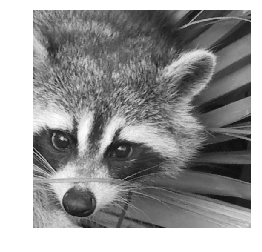

93.26379919052124


In [10]:
#first method
filtered = np.zeros(noisy_face.shape)
windowSize = 3
gap = windowSize // 2
import time as t
start = t.time()
for i in range(gap, noisy_face.shape[0]-gap):
    for j in range(gap, noisy_face.shape[1]-gap):
        dq = Dequeue()
        for c in range(-gap, gap+1):
            for r in range(-gap, gap+1):
                dq.insertLast(noisy_face[i+r,j+c])
                filtered[i,j] = np.median(dq.dq)
time = t.time()-start
plt.imshow(filtered, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print(time)
#time consuming

In [4]:
noisy_face.shape

(512, 512)

30.927295207977295


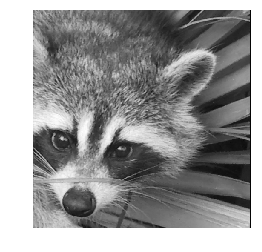

In [9]:
#second method(use dequeue)
import matplotlib.pyplot as plt
import time as t
start = t.time()
filtered = np.zeros(noisy_face.shape)
windowSize = 3
gap = windowSize // 2
for k in range(0, noisy_face.shape[0]-gap-1):
    dq = Dequeue()
    for i in range(k, k+3):
        for j in range(0,3):
            dq.insertLast(noisy_face[i,j])
        for n in range(gap+1, noisy_face.shape[1]-gap-1):
            for m in range(k, k+3):
                dq.popFirst()
                dq.insertLast(noisy_face[m,n])
            filtered[k+1,n-1] = np.median(dq.dq)
            
time = t.time()-start
plt.imshow(filtered, cmap=plt.cm.gray)
plt.axis('off')
plt.show
print(time)
#much faster!!